In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import matplotlib.cm as cm
print(regiones)


['Arica' 'Tarapaca' 'Antofagasta' 'Atacama' 'Coquimbo' 'Valparaíso'
 'Metropolitana' 'Libertador' 'Maule' 'Nuble' 'Biobío' 'Araucanía' 'Rios'
 'Lagos' 'Aysén' 'Magallanes']


In [450]:
listnames = ['CasosTotales','CasosNuevos','Tests','Gente','Fallecidos']
DataFrames = pd.read_excel('Chile.xlsx',sheet_name=None)
regiones = DataFrames['CasosTotales']['Region'].unique()
regab=['AP','TA','AN','AT','CO','VA','RM','OH','MA','NB','BI','AR','LR','LL','AI','MG']
dates =[]
for col in DataFrames['CasosTotales'].columns: 
    dates.append(col)
dates = dates[1:]

#dates = cases['date'].unique()
All = np.nan*np.zeros((len(listnames),len(regiones),len(dates)))


for l in range(len(listnames)):
    for d in range(len(dates)):
        #date = dates[d]
        #days[:,d,:] = d
        #region[l,d,:] = l
        #current_sheet =      cases[listnames[l]]               
        All[l,:,d] = DataFrames[listnames[l]][dates[d]].tolist()

#listRegions = 0:16
#listRegions =listRegions[listRegions~=14]
listt=np.arange(0,16)
#listt=listt[listt!=14]
CasosTotales = All[0,listt,:]
CasosNuevos = All[1,listt,:]
TestsNuevos = All[2,listt,:]
Gente = All[3,listt,:]
Fallecidos = All[4,listt,:]

In [482]:


def autolabel(ax,bars,bars2,listregions,angles,mh):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, rect2,name,ang in zip(bars,bars2,listregions,angles):
        #print(rect.get_height())
        #print(rect2.get_height())
        height = np.maximum(rect.get_height(), rect2.get_height())
        if(height<mh):
            height = np.maximum(rect.get_height(), rect2.get_height())/2 + mh/2
        ax.annotate(name,
                    xy=(rect.get_x() + rect.get_width() / 2.1, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=20,rotation=ang)
from copy import deepcopy
def transform(values):
    vals=deepcopy(values)
    vals[:-1] = values[1:]
    vals[-1] =values[0]
    return vals

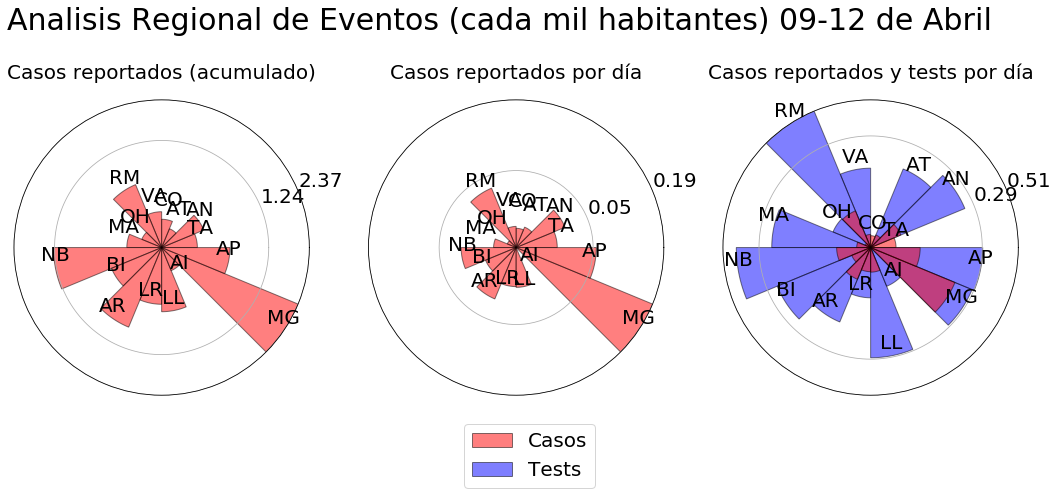

In [541]:

fig,ax = plt.subplots(1,3,figsize=(18,7),subplot_kw=dict(polar=True))
#ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
d = 3
N = 16
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
a = 0.0
b = (1-a)/2
fig.suptitle('Analisis Regional de Eventos (cada mil habitantes) 09-12 de Abril',fontsize=30)
#radiia = (1000*np.nansum(CasosNuevos, axis=1)/Gente[:,d])**a
radiia = (1000*CasosTotales[:,-1]/Gente[:,d])

#print(radiinorm)
radiinorm = 2*np.pi*(radiia)/np.sum(radiia)
#theta = np.cumsum(radiinorm)

radiinorm = radiinorm*0+theta[1]-theta[0]
theta=theta-theta[0]
#
radii0 = (1000*CasosTotales[:,-1]/Gente[:,d])**b
radii = (1000*np.nanmean(CasosNuevos, axis=1)/Gente[:,d])**b
radii2 = np.sqrt(0.25*1000*np.nansum(TestsNuevos, axis=1)/(Gente[:,d]))



bars = ax[0].bar(theta, transform(radii0), width=transform(radiinorm),bottom=0.0,color='red',alpha=0.5,align='edge',edgecolor='black')
ax[0].set_ylim([0,max(transform(radii0))])
ax[0].set_xticks([])

ax[0].set_yticks([np.percentile(radii0,93),max(radii0)])
ax[0].set_yticklabels([str(np.percentile(radii0,93)**2)[0:4], str(max(radii0**2))[0:4]],fontsize=20)
ax[0].set_title('Casos reportados (acumulado)',fontsize=20)

autolabel(ax[0],bars,bars,transform(regab),(theta+theta[1])/(2*np.pi)*0,max(transform(radii)))

#plt.locator_params(axis='y', nbins=3)

bars = ax[1].bar(theta, transform(radii), width=transform(radiinorm),bottom=0.0,color='red',alpha=0.5,align='edge',edgecolor='black')
ax[1].set_ylim([0,max(transform(radii))])
ax[1].set_xticks([])

ax[1].set_yticks([np.percentile(radii,92),max(radii)])
ax[1].set_yticklabels([str(np.percentile(radii,92)**2)[0:4], str(max(radii**2))[0:4]],fontsize=20)
ax[1].set_title('Casos reportados por día',fontsize=20)


bars2 = ax[2].bar(theta, transform(radii2), width=transform(radiinorm), bottom=0.0,align='edge',edgecolor='black',color='blue',alpha=0.5)
autolabel(ax[1],bars,bars,transform(regab),(theta+theta[1])/(2*np.pi)*0,max(transform(radii))/3)


bars = ax[2].bar(theta, transform(radii), width=transform(radiinorm), bottom=0.0,align='edge',edgecolor='black',color='red',alpha=0.5)

ax[2].set_ylim([0,max(transform(radii2))])

# print(width)
# print(theta)
ax[2].set_xticks([])#plt.axis('off')
ax[2].set_title('Casos reportados y tests por día',fontsize=20)
ax[2].set_yticks([np.percentile(radii2,85),max(radii2)])
ax[2].set_yticklabels([str(np.percentile(radii2,85)**2)[0:4], str(max(radii2**2))[0:4]],fontsize=20)
fig.legend([bars,bars2],['Casos','Tests'],fontsize=20,frameon='False',loc=8)


autolabel(ax[2],bars,bars2,transform(regab),0*(theta+theta[1])/(2*np.pi)*180,-1*max(transform(radii2)))
plt.savefig('Rosas')

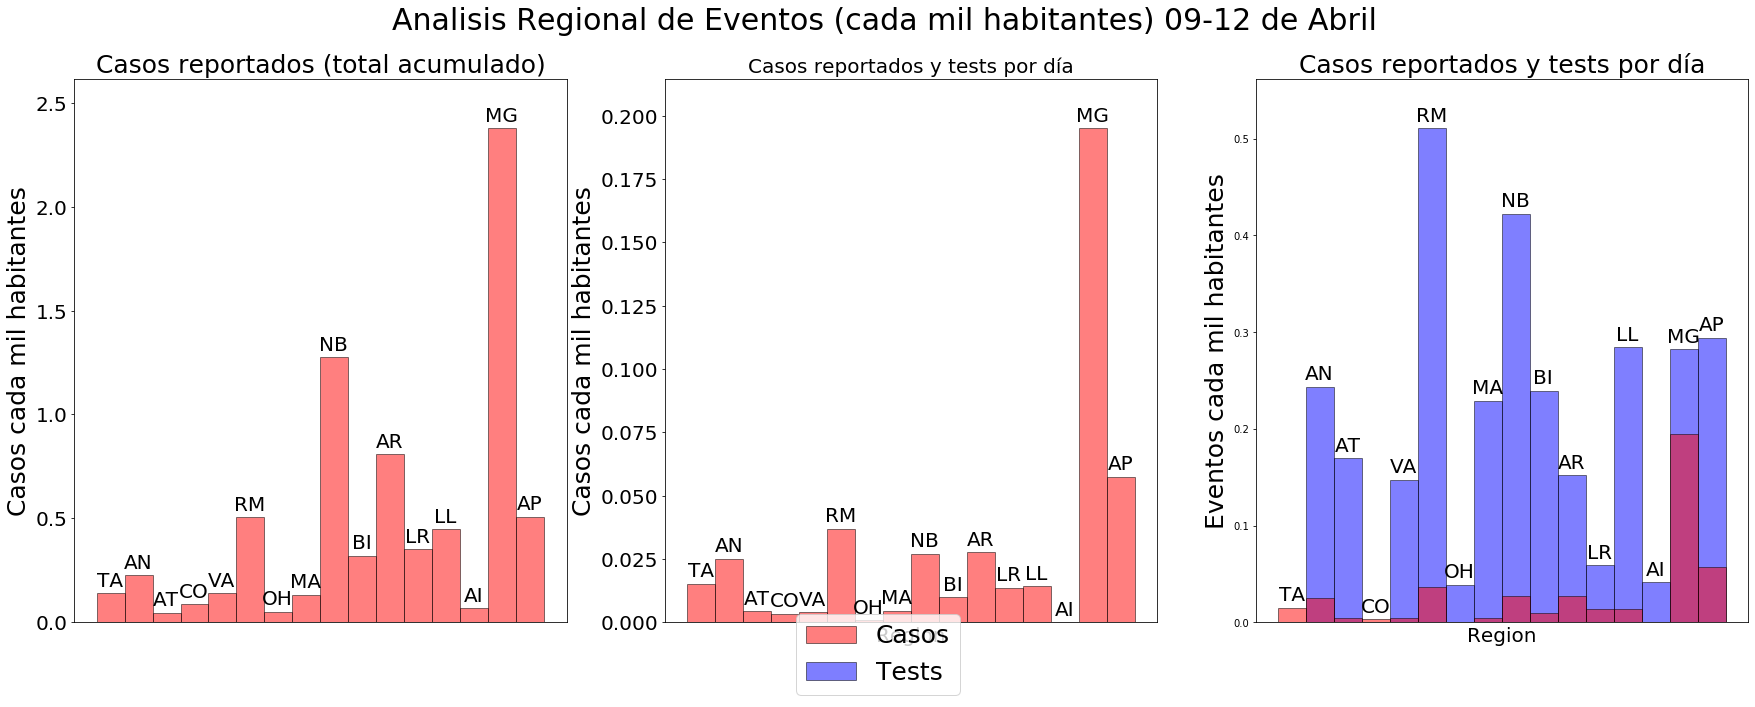

In [573]:

fig,ax = plt.subplots(1,3,figsize=(30,10),subplot_kw=dict(polar=False))
#ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
d = 3
N = 16
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)
a = 0.0
b = (1-a)/2
fig.suptitle('Analisis Regional de Eventos (cada mil habitantes) 09-12 de Abril',fontsize=30)
#radiia = (1000*np.nansum(CasosNuevos, axis=1)/Gente[:,d])**a
radiia = (1000*CasosTotales[:,-1]/Gente[:,d])

#print(radiinorm)
radiinorm = 2*np.pi*(radiia)/np.sum(radiia)
#theta = np.cumsum(radiinorm)

radiinorm = radiinorm*0+theta[1]-theta[0]
theta=theta-theta[0]
#
radii0 = (1000*CasosTotales[:,-1]/Gente[:,d])
radii = (1000*np.nanmean(CasosNuevos, axis=1)/Gente[:,d])
radii2 = 0.25*1000*np.nansum(TestsNuevos, axis=1)/(Gente[:,d])



bars = ax[0].bar(theta, transform(radii0), width=transform(radiinorm),bottom=0.0,color='red',alpha=0.5,align='edge',edgecolor='black')
ax[0].set_ylim([0,1.1*max(transform(radii0))])
ax[0].set_xticks([])
ax[1].tick_params(axis="y", labelsize=20)
ax[0].tick_params(axis="y", labelsize=20)
#ax[0].set_yticks([np.percentile(radii0,93),max(radii0)])
#ax[0].set_yticklabels([str(np.percentile(radii0,93)**2)[0:4], str(max(radii0**2))[0:4]],fontsize=20)
ax[0].set_title('Casos reportados (total acumulado)',fontsize=25)
ax[0].set_ylabel('Casos cada mil habitantes', fontsize=25)

autolabel(ax[0],bars,bars,transform(regab),(theta+theta[1])/(2*np.pi)*0,-1*max(transform(radii)))

#plt.locator_params(axis='y', nbins=3)




bars = ax[1].bar(theta, transform(radii), width=transform(radiinorm), bottom=0.0,align='edge',edgecolor='black',color='red',alpha=0.5)

ax[1].set_ylim([0,max(transform(radii2))])

# print(width)
# print(theta)
ax[1].set_xticks([])#plt.axis('off')
ax[1].set_title('Casos reportados y tests por día',fontsize=20)
#ax[1].set_yticks([np.percentile(radii2,85),max(radii2)])
#ax[1].set_yticklabels([str(np.percentile(radii2,85)**2)[0:4], str(max(radii2**2))[0:4]],fontsize=20)
ax[1].set_ylim([0,1.1*max(transform(radii))])
ax[1].set_xlabel('Region', fontsize=20)
ax[1].set_ylabel('Casos cada mil habitantes', fontsize=25)
autolabel(ax[1],bars,bars,transform(regab),0*(theta+theta[1])/(2*np.pi)*180,-1*max(transform(radii)))




bars2 = ax[2].bar(theta, transform(radii2), width=transform(radiinorm), bottom=0.0,align='edge',edgecolor='black',color='blue',alpha=0.5)


bars = ax[2].bar(theta, transform(radii), width=transform(radiinorm), bottom=0.0,align='edge',edgecolor='black',color='red',alpha=0.5)

ax[2].set_ylim([0,max(transform(radii2))])

# print(width)
# print(theta)
ax[2].set_xticks([])#plt.axis('off')
ax[2].set_title('Casos reportados y tests por día',fontsize=25)
#ax[1].set_yticks([np.percentile(radii2,85),max(radii2)])
#ax[1].set_yticklabels([str(np.percentile(radii2,85)**2)[0:4], str(max(radii2**2))[0:4]],fontsize=20)
ax[2].set_ylim([0,1.1*max(transform(radii2))])
ax[2].set_xlabel('Region', fontsize=20)
ax[2].set_ylabel('Eventos cada mil habitantes', fontsize=25)


fig.legend([bars,bars2],['Casos','Tests'],fontsize=25,frameon='False',loc=8)


autolabel(ax[2],bars,bars2,transform(regab),0*(theta+theta[1])/(2*np.pi)*180,-1*max(transform(radii2)))
plt.savefig('Rosas2')

In [179]:
theta, width = np.linspace(0.0, 2 * np.pi, N, endpoint=False, retstep=True)
print(theta)
print(width)

[0.         0.39269908 0.78539816 1.17809725 1.57079633 1.96349541
 2.35619449 2.74889357 3.14159265 3.53429174 3.92699082 4.3196899
 4.71238898 5.10508806 5.49778714 5.89048623]
0.39269908169872414


In [270]:
print(1000*CasosTotales/Gente)

[[0.33175859 0.38483996 0.47330892 0.5086965 ]
 [0.08773044 0.10588157 0.11495713 0.13915863]
 [0.15143185 0.18105983 0.19258181 0.22714778]
 [0.03494451 0.04542786 0.04542786 0.04542786]
 [0.08051891 0.08051891 0.08447886 0.08711882]
 [0.12665882 0.13271641 0.13657125 0.13987539]
 [0.39815499 0.4489085  0.48475932 0.50598863]
 [0.04811083 0.04811083 0.04920426 0.05029769]
 [0.1224939  0.12536485 0.1282358  0.13206374]
 [1.18807596 1.22552844 1.26090023 1.27546509]
 [0.29547695 0.30446973 0.31474719 0.3211706 ]
 [0.71978973 0.74381754 0.7720241  0.80963286]
 [0.30662332 0.32221434 0.33780536 0.35079787]
 [0.4102772  0.42113748 0.43923795 0.44889153]
 [0.06785707 0.06785707 0.06785707 0.06785707]
 [1.71737734 1.98759405 2.26381558 2.37790708]]


In [559]:
TestsNuevos

array([[  70.,   nan,   93.,  103.],
       [  nan,   nan,   nan,   nan],
       [ 182.,  128.,  107.,  175.],
       [  57.,   52.,   60.,   25.],
       [  nan,   nan,   nan,   nan],
       [ 301.,  249.,  248.,  273.],
       [5383., 3185., 2105., 3861.],
       [  68.,   nan,   74.,   nan],
       [ 397.,  219.,   nan,  341.],
       [ 364.,   nan,  259.,  189.],
       [ 592.,  149.,  281.,  469.],
       [ 124.,  148.,  126.,  184.],
       [  nan,   91.,   nan,   nan],
       [ 341.,  199.,  178.,  225.],
       [  10.,   nan,   nan,    7.],
       [  73.,   24.,   46.,   45.]])

In [317]:
print(radii**2*radiinorm)

[0.23001929 0.06050375 0.1004059  0.01747225 0.01319982 0.01597002
 0.14776162 0.00328028 0.01818269 0.10819606 0.03918281 0.11073688
 0.05456856 0.05671479 0.         0.78062606]


TypeError: 'ThetaAxis' object is not subscriptable